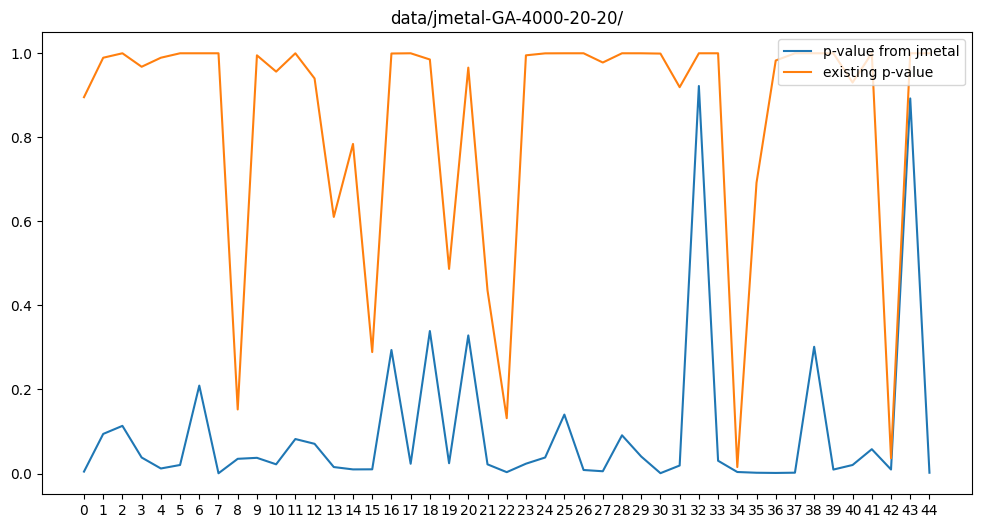

In [7]:
import os
from json import loads

class Solution:
    def __init__(self, variables,objectives,constraints):
        self.objectives = objectives


def show_graph(folder, pVal=False):
    files = os.listdir(folder)
    data = [ loads( open(folder + filename).read())  for filename in files ]
    key = "p-value" if pVal else "statistic"

    if pVal:
        jmetal_stats = [ el['jmetal']['solution_stats'][key] for el in data ] 
    else:
        jmetal_stats = [ eval(el['jmetal']['result']).objectives[0] * -1 for el in data ] 
    existing_stats = [  ]
    for el in data:
        stored  = el['stored_perm_info']
        for k in stored:
            existing_stats.append(stored[k]['divergence_from_cirq'][key])

    import matplotlib.pylab as plt
    
    plt.figure(figsize=(12,6), dpi=100)
    plt.plot(jmetal_stats, label=f"{key} from jmetal")
    plt.plot(existing_stats, label=f"existing {key}")
    plt.title(folder)

    plt.xticks(range(len(jmetal_stats)))
    plt.legend(loc="upper right")
    plt.show()



show_graph('data/jmetal-GA-4000-20-20/', pVal=True)

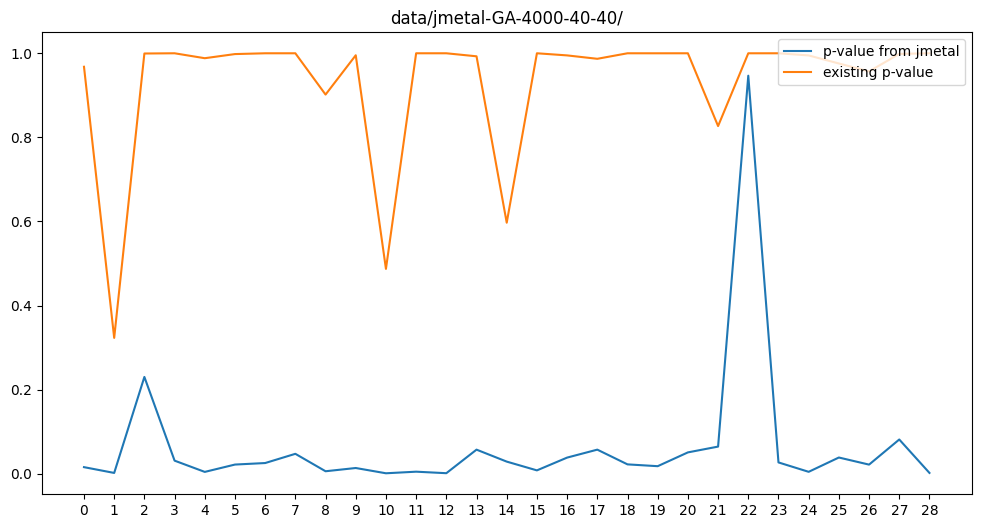

In [2]:
show_graph('data/jmetal-GA-4000-40-40/', pVal=True)

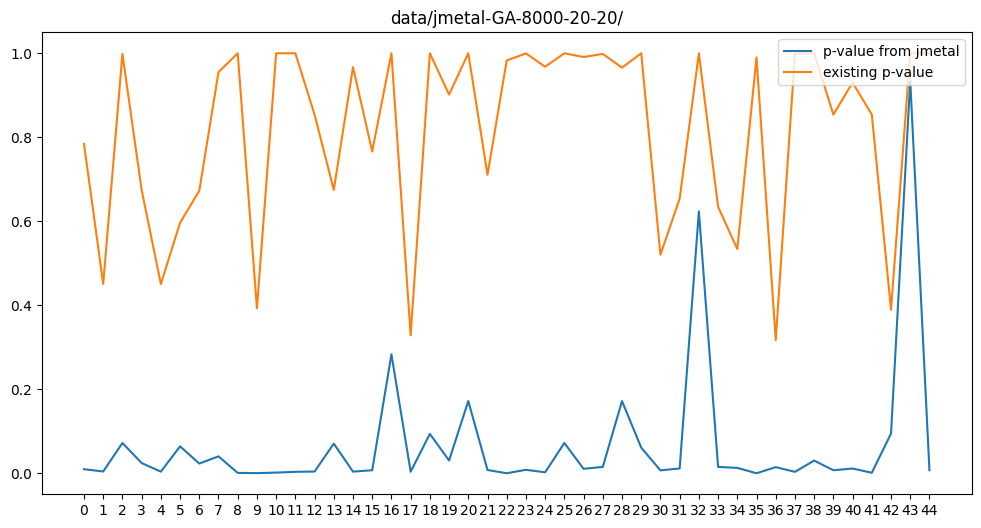

In [3]:
show_graph('data/jmetal-GA-8000-20-20/', pVal=True)

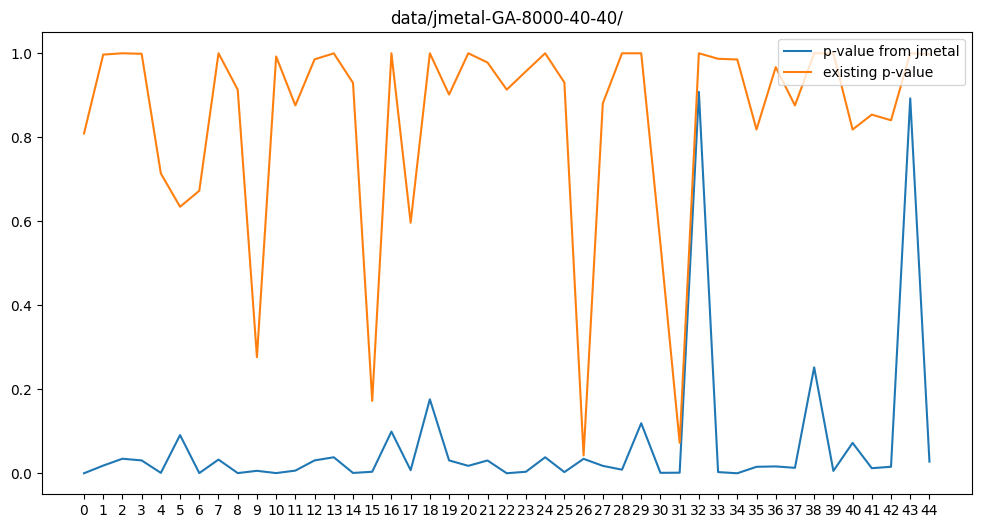

In [4]:
show_graph('data/jmetal-GA-8000-40-40/', pVal=True)

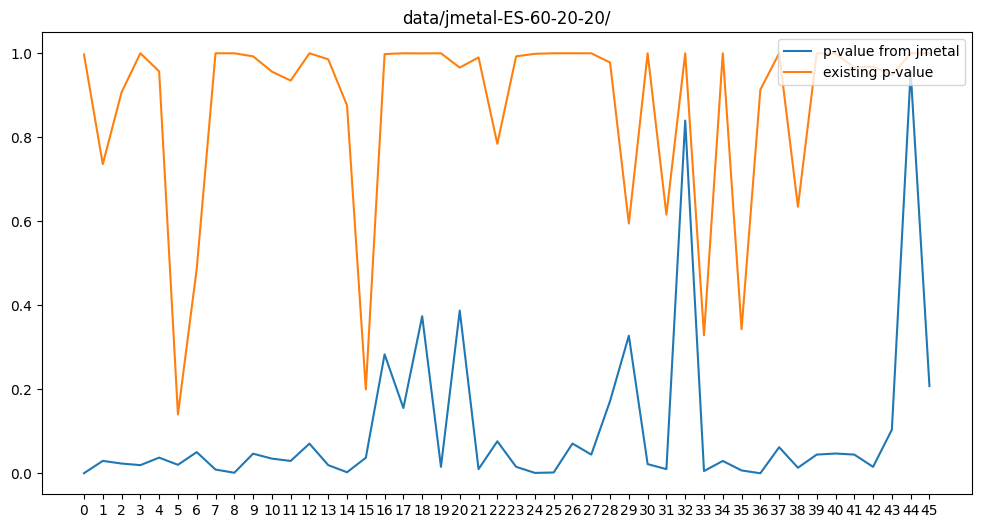

In [5]:
show_graph('data/jmetal-ES-60-20-20/', pVal=True)